Columns in the dataset:
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')
Accuracy: 25.76%
Confusion Matrix:
[[ 9  0  3]
 [ 5  0  4]
 [80  6 25]]


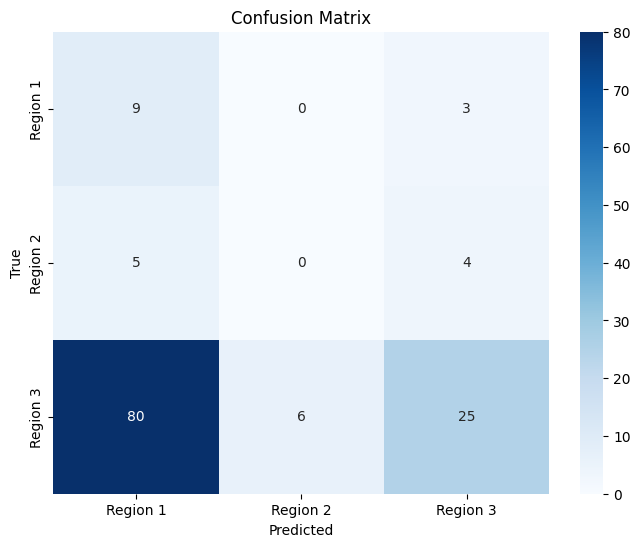

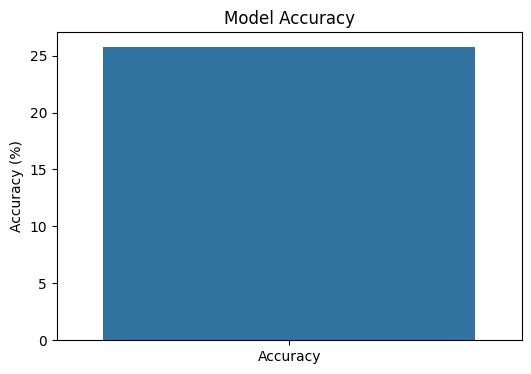

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('customers.csv')

# Inspect the column names to check the target variable
print("Columns in the dataset:")
print(data.columns)

# Set the features (X) and target (y)
X = data.drop(columns=['Region'])  # Feature matrix
y = data['Region']  # Target variable

# Standardize the feature matrix (scaling the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier (GaussianNB for continuous data)
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Region 1', 'Region 2', 'Region 3'], yticklabels=['Region 1', 'Region 2', 'Region 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualization: Accuracy Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=["Accuracy"], y=[accuracy * 100])
plt.title("Model Accuracy")
plt.ylabel("Accuracy (%)")
plt.show()

